# This Notebook Perform two things...........

# 1 Section:                                                                 
Research Area Subject Area Prediction (Large Scale classification) using shallow Multi-Layer Perceptron (MLP) model

# 2 Section:
Research Paper Recommendation for reading: using sentence transformer model

Research Papers dataset link::
https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts/data


# 1 Section:                                                                 

# Loading tools and dataset

In [1]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval
# is used for safely evaluating strings containing Python literals or container displays
# (e.g., lists, dictionaries) to their corresponding Python objects.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
import pandas as pd

# Use the more robust engine and tell it to skip any lines it still finds problematic
arxiv_data = pd.read_csv("arxiv_data.csv")

In [17]:
arxiv_data.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


# Data Cleaning and Preprocessing

In [18]:
arxiv_data.shape

(51774, 3)

In [19]:
arxiv_data.isnull().sum()

,0
titles,0
summaries,0
terms,0


In [20]:
arxiv_data.duplicated().sum()

np.int64(12783)

In [21]:
# getting unique labels
labels_column = arxiv_data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.CV' 'cs.LG' 'cs.AI' ... 'I.2.6; I.5.1; G.3'
 '92E10, 46M20, 94A08, 68U10, 44A12, 55R35' '92E10']
lenght : 1099


In [22]:
# remove duplicate entries based on the "titles" (terms) column
# This filters the DataFrame, keeping only the rows where the titles are not duplicated.
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
# There are some terms with occurrence as low as 1.
print(sum(arxiv_data['terms'].value_counts()==1))
# how many unique terms
print(arxiv_data['terms'].nunique())

There are 38972 rows in the deduplicated dataset.
2321
3157


In [23]:
# Filtering the rare terms. (it keeps only those rows where the "terms" value occurs more than once in the original DataFrame.)
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(36651, 3)

In [24]:
# It evaluates the given string containing a Python literal or container display (e.g., a list or dictionary) and returns the corresponding Python object.
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.CV', 'cs.LG']), list(['cs.CV', 'cs.AI', 'cs.LG']),
       list(['cs.CV', 'cs.AI'])], dtype=object)

# train and test split.

In [25]:
test_split = 0.1

# Initial train and test split.
# The stratify parameter ensures that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.
train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 32985
Number of rows in validation set: 1833
Number of rows in test set: 1833


In [26]:
# creates a TensorFlow RaggedTensor (terms) from the values in the "terms" column of the train_df DataFrame. A RaggedTensor is a tensor with non-uniform shapes
terms = tf.ragged.constant(train_df['terms'].values)
# This line creates a StringLookup layer in TensorFlow. The purpose of this layer is to map strings to integer indices and vice versa. The output_mode="multi_hot" indicates that the layer will output a multi-hot encoded representation of the input strings.
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
# This step adapts the StringLookup layer to the unique values in the "terms" column, building the vocabulary.
lookup.adapt(terms)
# retrieve vocabulary
vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', np.str_('cs.CV'), np.str_('cs.LG'), np.str_('stat.ML'), np.str_('cs.AI'), np.str_('eess.IV'), np.str_('cs.RO'), np.str_('cs.CL'), np.str_('cs.NE'), np.str_('cs.CR'), np.str_('math.OC'), np.str_('eess.SP'), np.str_('cs.GR'), np.str_('cs.SI'), np.str_('cs.MM'), np.str_('cs.SY'), np.str_('cs.IR'), np.str_('cs.MA'), np.str_('eess.SY'), np.str_('cs.HC'), np.str_('math.IT'), np.str_('cs.IT'), np.str_('cs.DC'), np.str_('cs.CY'), np.str_('stat.AP'), np.str_('stat.TH'), np.str_('math.ST'), np.str_('stat.ME'), np.str_('eess.AS'), np.str_('cs.SD'), np.str_('q-bio.QM'), np.str_('q-bio.NC'), np.str_('cs.DS'), np.str_('cs.GT'), np.str_('cs.NI'), np.str_('cs.CG'), np.str_('cs.SE'), np.str_('I.2.6'), np.str_('stat.CO'), np.str_('math.NA'), np.str_('cs.NA'), np.str_('physics.chem-ph'), np.str_('cs.DB'), np.str_('q-bio.BM'), np.str_('cs.LO'), np.str_('cs.PL'), np.str_('cond-mat.dis-nn'), np.str_('68T45'), np.str_('math.PR'), np.str_('physics.comp-ph'), np.str_('cs.CE'), np.str_('c

In [27]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['stat.ML', 'cs.LG']
Label-binarized representation: [[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]]


In [32]:
# following lines::
# which is used for automatic adjustment of resource usage by TensorFlow's data loading pipeline.

#max_seqlen: Maximum sequence length. It indicates the maximum length allowed for sequences.
max_seqlen = 150
#batch_size: Batch size. It specifies the number of samples to use in each iteration.
batch_size = 128
#padding_token: A token used for padding sequences.
padding_token = "<pad>"
#auto = tf.data.AUTOTUNE: auto is assigned the value tf.data.AUTOTUNE,
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    # creating sequences of labesls
    labels = tf.ragged.constant(dataframe["terms"].values)
    #This line uses the previously defined lookup layer to convert the ragged tensor of labels into a binarized representation. The resulting label_binarized is a NumPy array.
    label_binarized = lookup(labels).numpy()
    # creating sequences of text.
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["summaries"].values, label_binarized))
    # shuffling data basis on condition
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

"""
In summary, the make_dataset function is designed to create a
dataset suitable for training a model. It takes a dataframe as input,
assumes it has "abstracts" and "terms" columns, and creates a dataset of
batches where each batch consists of abstract
sequences and their corresponding binarized label sequences.
"""

'\nIn summary, the make_dataset function is designed to create a \ndataset suitable for training a model. It takes a dataframe as input, \nassumes it has "abstracts" and "terms" columns, and creates a dataset of \nbatches where each batch consists of abstract \nsequences and their corresponding binarized label sequences. \n'

In [33]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [40]:
def invert_multi_hot(encoded_labels):
  hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
  return np.take(vocab, hot_indices)

In [41]:
# This code snippet is iterating through batches of the training dataset and printing the abstract text along with the corresponding labels.
text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'We present a novel approach to category-level 6D object pose and size\nestimation. To tackle intra-class shape variations, we learn canonical shape\nspace (CASS), a unified representation for a large variety of instances of a\ncertain object category. In particular, CASS is modeled as the latent space of\na deep generative model of canonical 3D shapes with normalized pose. We train a\nvariational auto-encoder (VAE) for generating 3D point clouds in the canonical\nspace from an RGBD image. The VAE is trained in a cross-category fashion,\nexploiting the publicly available large 3D shape repositories. Since the 3D\npoint cloud is generated in normalized pose (with actual size), the encoder of\nthe VAE learns view-factorized RGBD embedding. It maps an RGBD image in\narbitrary view into a pose-independent 3D shape representation. Object pose is\nthen estimated via contrasting it with a pose-dependent feature of the input\nRGBD extracted with a separate deep neural networks. We i

In [43]:
# This code calculates the size of the vocabulary in the "abstracts" column of the train_df DataFrame.

# Creating vocabulary with uniques words
vocabulary = set()
train_df["summaries"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

153614


# Text Vectorization

In [44]:
# Initializes a TextVectorization layer
text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size,ngrams=2,output_mode="tf_idf")
# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

In [45]:
"""
Mapping Vectorization to Datasets: The code maps the text vectorization operation to
each element of the training, validation, and test datasets. This ensures that the text
data in each dataset is transformed into numerical vectors using the adapted TextVectorization layer.
The num_parallel_calls parameter is used to parallelize the mapping process, and prefetch is
applied to prefetch data batches
for better performance.
"""
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

# model training

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive
# --- (Your model definition code remains the same) ---
model1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])
# --- (End of your model definition) ---

# 2. Define Callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Define the path in your Google Drive
model_save_path = '/content/drive/My Drive/Colab Notebooks/my_best_model.keras'

# Save the model every 500 batches/steps
checkpoint_callback = ModelCheckpoint(
    filepath=model_save_path,
    monitor='val_loss',
    save_best_only=True,
    save_freq=500,  # <-- ADD THIS LINE
    verbose=1
)

# Then run your fit command as before
history = model1.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stopping, checkpoint_callback]
)


Epoch 1/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 49s 168ms/step - binary_accuracy: 0.9436 - loss: 0.1315 - val_binary_accuracy: 0.9944 - val_loss: 0.0196
Epoch 2/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 94s 220ms/step - binary_accuracy: 0.9943 - loss: 0.0204 - val_binary_accuracy: 0.9943 - val_loss: 0.0191
Epoch 3/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 69s 173ms/step - binary_accuracy: 0.9955 - loss: 0.0153 - val_binary_accuracy: 0.9943 - val_loss: 0.0192
Epoch 4/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - binary_accuracy: 0.9962 - loss: 0.0125 - val_binary_accuracy: 0.9944 - val_loss: 0.0202
Epoch 5/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 77s 159ms/step - binary_accuracy: 0.9968 - loss: 0.0106 - val_binary_accuracy: 0.9943 - val_loss: 0.0203
Epoch 6/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 93s 201ms/step - binary_accuracy: 0.9972 - loss: 0.0093 - val_binary_accuracy: 0.9944 - val_loss: 0.0213
Epoch 7/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 72s 160ms/step - binary_accuracy: 0.9975 - loss: 0.0084 - val_binary_accuracy: 0.9944 - va

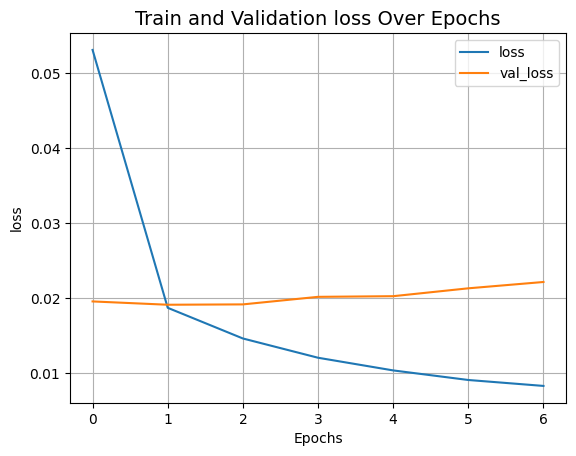

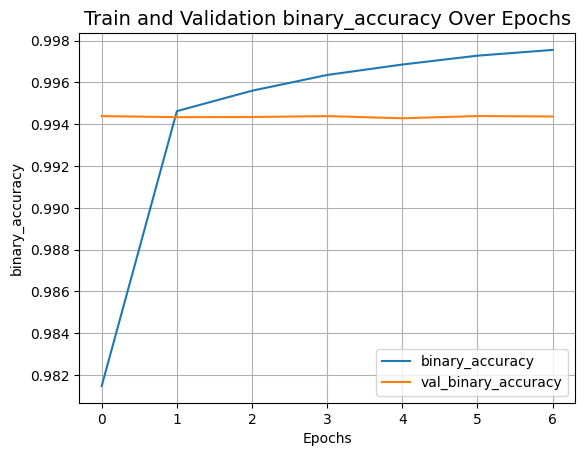

In [60]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

# Model Evaluation

In [74]:
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 153614), dtype=tf.float32, name=None), TensorSpec(shape=(None, 153), dtype=tf.int64, name=None))>


In [61]:
# model evaltuation on test and val dataset
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - binary_accuracy: 0.9943 - loss: 0.0186
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - binary_accuracy: 0.9944 - loss: 0.0192
Categorical accuracy on the test set: 99.42%.
Categorical accuracy on the validation set: 99.43%.


In [68]:
# --- 1. Get Per-Sample Predictions using model.predict() ---
y_pred_probs = model1.predict(test_dataset)
# Convert prediction probabilities to single class labels (e.g., [0, 4, 1, ...])
y_pred = np.argmax(y_pred_probs, axis=1)

# --- 2. Get the corresponding True Labels ---
# Extract the one-hot encoded true labels from the dataset
y_true_one_hot = np.concatenate([y for x, y in test_dataset], axis=0)
# Convert true labels to the same format as predictions
y_true = np.argmax(y_true_one_hot, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step


In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# ==============================================================================
# --- 1. USER SETUP: PLEASE PROVIDE YOUR MODEL, DATASETS, AND CLASS NAMES ---
# ==============================================================================

# This script assumes you have the following variables already loaded and available:

# model: Your trained TensorFlow/Keras model.
# e.g., model = tf.keras.models.load_model('my_classifier.h5')
model = model1 # <-- REPLACE WITH YOUR TRAINED MODEL

# test_dataset: Your preprocessed tf.data.Dataset for testing.
test_dataset = test_dataset # <-- REPLACE WITH YOUR TEST DATASET

# validation_dataset: Your preprocessed tf.data.Dataset for validation.
validation_dataset = validation_dataset # <-- REPLACE WITH YOUR VALIDATION DATASET

# class_names: A list of strings containing the names of your classes in order.
# e.g., class_names = ['cs.AI', 'cs.CV', 'cs.LG', 'cs.CL', ...]
class_names = arxiv_data['terms'].unique() # <-- REPLACE WITH YOUR LIST OF CLASS NAMES

# --- Sanity check to ensure placeholders are filled ---
if model is None or test_dataset is None or validation_dataset is None or not class_names:
    print("Please fill in the placeholder variables (model, test_dataset, etc.) before running.")
else:
    # ==============================================================================
    # --- 2. OVERALL ACCURACY EVALUATION ---
    # ==============================================================================
    print("--- 2. Calculating Overall Accuracy ---")
    _, test_acc = model.evaluate(test_dataset, verbose=0)
    _, val_acc = model.evaluate(validation_dataset, verbose=0)

    print(f"\nCategorical accuracy on the test set: {round(test_acc * 100, 2)}%.")
    print(f"Categorical accuracy on the validation set: {round(val_acc * 100, 2)}%.\n")


    # ==============================================================================
    # --- 3. PREPARING PREDICTIONS FOR DETAILED ANALYSIS ---
    # ==============================================================================
    print("--- 3. Generating predictions for detailed analysis ---")
    # Get the model's prediction probabilities
    y_pred_probs = model.predict(test_dataset)

    # Convert probabilities to class indices (the predicted class)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Get the true labels from the test dataset
    y_true_one_hot = np.concatenate([y for x, y in test_dataset], axis=0)

    # Convert one-hot encoded true labels to class indices
    y_true = np.argmax(y_true_one_hot, axis=1)
    print("Predictions and true labels are ready.\n")


    # ==============================================================================
    # --- 4. DETAILED CLASSIFICATION REPORT (PRECISION, RECALL, F1-SCORE) ---
    # ==============================================================================
    print("--- 4. Detailed Classification Report ---")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))


    # ==============================================================================
    # --- 5. CONFUSION MATRIX VISUALIZATION ---
    # ==============================================================================
    print("--- 5. Generating Confusion Matrix ---")
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()
    print("Displayed the confusion matrix plot.\n")


    # ==============================================================================
    # --- 6. PER-CLASS METRICS (TP, TN, FP, FN) ---
    # ==============================================================================
    print("--- 6. Calculating TP, TN, FP, FN for Each Class ---")
    for i, class_name in enumerate(class_names):
        # True Positives (TP): The diagonal element
        tp = cm[i, i]

        # False Positives (FP): The sum of the column, excluding the diagonal
        fp = cm[:, i].sum() - tp

        # False Negatives (FN): The sum of the row, excluding the diagonal
        fn = cm[i, :].sum() - tp

        # True Negatives (TN): The sum of all other cells
        tn = cm.sum() - (tp + fp + fn)

        print(f"--- Metrics for class: {class_name} ---")
        print(f"True Positives:  {tp}")
        print(f"True Negatives:  {tn}")
        print(f"False Positives: {fp}")
        print(f"False Negatives: {fn}\n")

--- Metrics for class: cs.AI ---
True Positives:  957
True Negatives:  718
False Positives: 50
False Negatives: 108

--- Metrics for class: cs.CV ---
True Positives:  706
True Negatives:  959
False Positives: 116
False Negatives: 52

--- Metrics for class: cs.LG ---
True Positives:  0
True Negatives:  1823
False Positives: 0
False Negatives: 10

--- Metrics for class: cs.CL ---
True Positives:  0
True Negatives:  1832
False Positives: 1
False Negatives: 0

--- Metrics for class: cs.NE ---
True Positives:  0
True Negatives:  1830
False Positives: 3
False Negatives: 0



IndexError: index 5 is out of bounds for axis 0 with size 5

In [75]:
import numpy as np

# This assumes 'y_true' is your array of true integer labels
# and 'class_names' is your list of class name strings.

unique_classes, counts = np.unique(y_true, return_counts=True)

print("Class distribution in the test set:")
for class_index, count in zip(unique_classes, counts):
  # Make sure the class_index is within the bounds of your class_names list
  if class_index < len(class_names):
    print(f"- {class_names[class_index]}: {count} samples")
  else:
    print(f"- Class Index {class_index}: {count} samples (Name not found)")

Class distribution in the test set:
- cs.CV: 1065 samples
- cs.LG: 758 samples
- cs.CL: 10 samples


In [78]:
from sklearn.model_selection import train_test_split

# Assume X is your feature data and y is your label data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # This is the magic ingredient!
    random_state=42
)

NameError: name 'X' is not defined

# Save Model and Text Vectorizer:

In [57]:
from tensorflow import keras
import pickle
# # Save the model
# model1.save("models/model.h5")

# Save the configuration of the text vectorizer
saved_text_vectorizer_config = text_vectorizer.get_config()
with open("models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)


# Save the vocabulary
with open("models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

FileNotFoundError: [Errno 2] No such file or directory: 'models/text_vectorizer_config.pkl'

# Load Model and Text Vectorizer:

In [54]:
from tensorflow import keras
import pickle

# Load the model
loaded_model = keras.models.load_model("models/model.h5")

from tensorflow.keras.layers import TextVectorization

# Load the configuration of the text vectorizer
with open("models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)

# Create a new TextVectorization layer with the saved configuration
loaded_text_vectorizer = TextVectorization.from_config(saved_text_vectorizer_config)

# Load the saved weights into the new TextVectorization layer
with open("models/text_vectorizer_weights.pkl", "rb") as f:
    weights = pickle.load(f)
    loaded_text_vectorizer.set_weights(weights)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'models/model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Load the vocabulary
with open("models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)


# Model Prediction

In [ ]:
def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(loaded_vocab, hot_indices)

In [ ]:
def predict_category(abstract, model, vectorizer, label_lookup):
    # Preprocess the abstract using the loaded text vectorizer
    preprocessed_abstract = vectorizer([abstract])

    # Make predictions using the loaded model
    predictions = model.predict(preprocessed_abstract)

    # Convert predictions to human-readable labels
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])

    return predicted_labels

In [ ]:
# Example usage
new_abstract = "Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)


1/1 [==============================] - 2s 2s/step
Predicted Categories: ['cs.LG']


In [ ]:
# Example usage
new_abstract = 'Deep networks and decision forests (such as random forests and gradient\nboosted trees) are the leading machine learning methods for structured and\ntabular data, respectively. Many papers have empirically compared large numbers\nof classifiers on one or two different domains (e.g., on 100 different tabular\ndata settings). However, a careful conceptual and empirical comparison of these\ntwo strategies using the most contemporary best practices has yet to be\nperformed. Conceptually, we illustrate that both can be profitably viewed as\n"partition and vote" schemes. Specifically, the representation space that they\nboth learn is a partitioning of feature space into a union of convex polytopes.\nFor inference, each decides on the basis of votes from the activated nodes.\nThis formulation allows for a unified basic understanding of the relationship\nbetween these methods. Empirically, we compare these two strategies on hundreds\nof tabular data settings, as well as several vision and auditory settings. Our\nfocus is on datasets with at most 10,000 samples, which represent a large\nfraction of scientific and biomedical datasets. In general, we found forests to\nexcel at tabular and structured data (vision and audition) with small sample\nsizes, whereas deep nets performed better on structured data with larger sample\nsizes. This suggests that further gains in both scenarios may be realized via\nfurther combining aspects of forests and networks. We will continue revising\nthis technical report in the coming months with updated results.'
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 [==============================] - 0s 459ms/step
Predicted Categories: ['cs.LG' 'cs.AI']


In [ ]:
# great resutls...................................

# =======Section 2========

# 2 Recommendation System

In [ ]:
arxiv_data.drop(columns = ["terms","abstracts"], inplace = True)

In [ ]:
arxiv_data.drop_duplicates(inplace= True)
arxiv_data.reset_index(drop= True,inplace = True)

In [ ]:
pd.set_option('display.max_colwidth', None)
arxiv_data

# Sentence Transformers

In [ ]:
# !pip install -U -q sentence-transformers

In [ ]:
# This imports the SentenceTransformer class from the Sentence Transformers library.
from sentence_transformers import SentenceTransformer, util
# we load all-MiniLM-L6-v2, which is a MiniLM model fine tuned on a large dataset of over
# 1 billion training pairs.
#This initializes the 'all-MiniLM-L6-v2' model from Sentence Transformers.
# This model is capable of encoding sentences into fixed-size vectors (embeddings).
model = SentenceTransformer('all-MiniLM-L6-v2')
#Our sentences we like to encode
sentences = arxiv_data['titles']
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

"""
The embeddings can be used for various natural language processing (NLP) tasks,
such as similarity search, clustering
"""

In [ ]:
embeddings

# Why select all-MiniLM-L6-v2?

All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs. Source

Its small in size 80 MB with good performance.

# Print the embeddings

In [ ]:
c = 0
#This loop iterates over pairs of sentences and their corresponding embeddings.
#zip is used to iterate over both lists simultaneously.
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding length:", len(embedding)) # list of floats
    print("")
    # Breaks out of the loop after printing information for the first 5 sentences.
    if c >=5:
        break
    c +=1

# Save files

In [ ]:
import pickle
# Saving sentences and corresponding embeddings
with open('embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

with open('sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

with open('rec_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Recommendation for similar papers

In [ ]:
# load save files
embeddings = pickle.load(open('models/embeddings.pkl','rb'))
sentences = pickle.load(open('models/sentences.pkl','rb'))
rec_model = pickle.load(open('models/rec_model.pkl','rb'))

In [ ]:
import torch

def recommendation(input_paper):
    # Calculate cosine similarity scores between the embeddings of input_paper and all papers in the dataset.
    cosine_scores = util.cos_sim(embeddings, rec_model.encode(input_paper))

    # Get the indices of the top-k most similar papers based on cosine similarity.
    top_similar_papers = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

    # Retrieve the titles of the top similar papers.
    papers_list = []
    for i in top_similar_papers.indices:
        papers_list.append(sentences[i.item()])

    return papers_list


In [ ]:
# exampel usage 1: (use this paper as input (Attention is All you Need))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

In [ ]:
# exampel usage 2: (use this paper as input (BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

In [ ]:
# exampel usage 3: (use this paper as input (Review of deep learning: concepts, CNN architectures, challenges, applications, future directions))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

In [ ]:
# install this versions
import sentence_transformers
import tensorflow
import torch
print(torch.__version__)
print(sentence_transformers.__version__)
print(tensorflow.__version__)